<img src=".\images\Logo.png" width=150 align="left" /> <img src=".\images\Logo2.jpg" width=450 align="right" />


# <center><font color= #1e8449 > <b>CU55_Modelo agregado de estimación del gasto medio por turista
¶</font></center>

<font color='steelblue'><b>Citizenlab Data Science Methodology > II - Data Processing Domain </font>
***
> # <font color='steelblue'> <b>12.- EDA - Exploratory Data Analysis Analysis</font>

## <font color='steelblue'>Tasks</font>

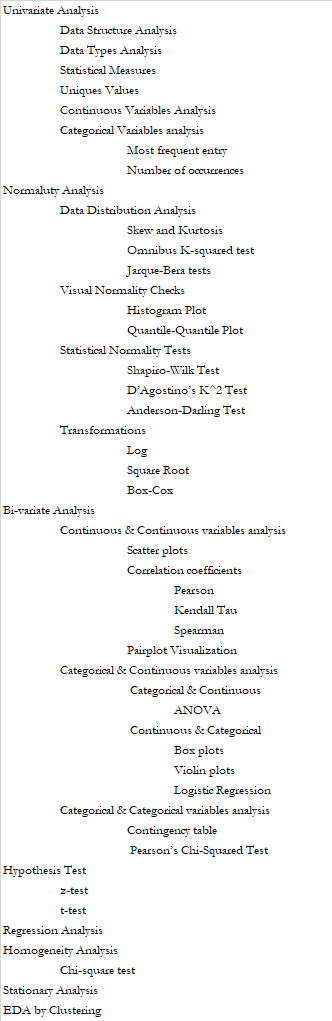
    


## <font color='green'>File</font>

- <font color='steelblue'> <b>Input File: CU_55_08_03_gasto_municipio.csv</font>
- <font color='steelblue'> <b>Sampled Input File: CU_55_07_03_gasto_municipio.csv</font>
- <font color='steelblue'> <b>Output File: No aplica</font>

### Encoding

Con la siguiente expresión se evitan problemas con el encoding al ejecutar el notebook. Es posible que deba ser eliminada o adaptada a la máquina en la que se ejecute el código.

In [29]:
Sys.setlocale(category = "LC_ALL", locale = "es_ES.UTF-8")

[1] "LC_COLLATE=es_ES.UTF-8;LC_CTYPE=es_ES.UTF-8;LC_MONETARY=es_ES.UTF-8;LC_NUMERIC=C;LC_TIME=es_ES.UTF-8"

## <font color='green'>Settings</font>

### Libraries to use

In [36]:
library(readr)
library(dplyr)
library(sf)
library(tidyr)
library(ggplot2)
library(summarytools)
library(GGally)
library(nortest)
library(lubridate)


### Paths

In [37]:
iPath <- "Data/Input/"
oPath <- "Data/Output/"

## <font color='green'>Data Load</font>

<font color='tomato'><b> OPCION A:</b> Seleccionar fichero en ventana para mayor comodidad</font> 

Data load using the {tcltk} package. Ucomment the line if using this option

In [38]:
# file_data <- tcltk::tk_choose.files(multi = FALSE)

<font color='tomato'><b> OPCION B:</b> Especificar el nombre de archivo</font>



In [39]:
iFile <- "CU_55_08_03_gasto_municipio.csv"
file_data <- paste0(iPath, iFile)

if(file.exists(file_data)){
    cat("Se leerán datos del archivo: ", file_data)
} else{
    warning("Cuidado: el archivo no existe.")
}


Se leerán datos del archivo:  Data/Input/CU_55_08_03_gasto_municipio.csv

#### Data file to dataframe

Usar la función adecuada según el formato de entrada (xlsx, csv, json, ...)

In [40]:
data <- read_csv(file_data)

Rows: 50294 Columns: 10
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (5): mes, pais_orig_cod, pais_orig, mun_dest, CMUN
dbl (4): mun_dest_cod, turistas, gasto, Target
lgl (1): is_train

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Data Structure

Estructura de  los datos:

In [41]:
data |> glimpse()

Rows: 50,294
Columns: 10
$ mes           <chr> "2019-08", "2021-07", "2021-07", "2022-01", "2019-08", "…
$ pais_orig_cod <chr> "110", "010", "010", "000", "128", "000", "011", "126", …
$ pais_orig     <chr> "Francia", "Total Europa", "Total Europa", "Total", "Rum…
$ mun_dest_cod  <dbl> 28161, 28176, 28132, 28141, 28130, 28126, 28075, 28005, …
$ mun_dest      <chr> "Valdemoro", "Villanueva de la Cañada", "San Martín de l…
$ turistas      <dbl> 466, 1375, 465, 54, 135, 30, 285, 768, 31, 1646, 116, 36…
$ CMUN          <chr> "161", "176", "132", "141", "130", "126", "075", "005", …
$ gasto         <dbl> 76.360, 99.650, 99.650, 107.820, 109.210, 118.230, 118.2…
$ Target        <dbl> 76.360, 99.650, 99.650, 107.820, 109.210, 118.230, 118.2…
$ is_train      <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TR…


Muestra de los primeros datos:

In [42]:
data |> slice_head(n = 5)

mes,pais_orig_cod,pais_orig,mun_dest_cod,mun_dest,turistas,CMUN,gasto,Target,is_train
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<lgl>
2019-08,110,Francia,28161,Valdemoro,466,161,76.36,76.36,TRUE
2021-07,010,Total Europa,28176,Villanueva de la Cañada,1375,176,99.65,99.65,TRUE
2021-07,010,Total Europa,28132,San Martín de la Vega,465,132,99.65,99.65,TRUE
2022-01,000,Total,28141,Sevilla la Nueva,54,141,107.82,107.82,TRUE
2019-08,128,Rumania,28130,San Fernando de Henares,135,130,109.21,109.21,TRUE


**Tamaño de Memoria** de los datos

In [43]:
object.size(data)

3871832 bytes

**Structure of non-numerical features**

In [44]:
# Display non-numerical features
data |> select(where(~ !is.numeric(.x))) |> freq()

,Freq,% Valid,% Valid Cum.,% Total,% Total Cum.
2019-07,1530,3.042112,3.042112,3.042112,3.042112
2019-08,1603,3.187259,6.229371,3.187259,6.229371
2019-09,1545,3.071937,9.301308,3.071937,9.301308
2019-10,1506,2.994393,12.295701,2.994393,12.295701
2019-11,1432,2.847258,15.142959,2.847258,15.142959
2019-12,1469,2.920826,18.063785,2.920826,18.063785
2020-01,1490,2.962580,21.026365,2.962580,21.026365
2020-02,1349,2.682228,23.708593,2.682228,23.708593
2020-03,1227,2.439655,26.148248,2.439655,26.148248
2020-04,816,1.622460,27.770708,1.622460,27.770708


**Structure of numerical features**

In [45]:
data |> select(where(is.numeric)) |> descr()


,gasto,mun_dest_cod,Target,turistas
Mean,1.097303e+02,2.810040e+04,1.097303e+02,1.053161e+03
Std.Dev,2.955639e+01,1.244046e+02,2.955639e+01,1.129686e+04
Min,3.731000e+01,2.800200e+04,3.731000e+01,3.000000e+01
Q1,9.299000e+01,2.804700e+04,9.299000e+01,5.100000e+01
Median,1.066800e+02,2.807900e+04,1.066800e+02,9.900000e+01
Q3,1.182300e+02,2.812900e+04,1.182300e+02,2.540000e+02
Max,3.897600e+02,2.890300e+04,3.897600e+02,5.363690e+05
MAD,1.817668e+01,6.375180e+01,1.817668e+01,8.747340e+01
IQR,2.524000e+01,8.200000e+01,2.524000e+01,2.030000e+02
CV,2.693549e-01,4.427147e-03,2.693549e-01,1.072661e+01


## Data Types

**Tipo** de datos

In [46]:
sapply(data, class)
glimpse(data)

mes pais_orig_cod     pais_orig  mun_dest_cod      mun_dest 
  "character"   "character"   "character"     "numeric"   "character" 
     turistas          CMUN         gasto        Target      is_train 
    "numeric"   "character"     "numeric"     "numeric"     "logical"

Rows: 50,294
Columns: 10
$ mes           <chr> "2019-08", "2021-07", "2021-07", "2022-01", "2019-08", "…
$ pais_orig_cod <chr> "110", "010", "010", "000", "128", "000", "011", "126", …
$ pais_orig     <chr> "Francia", "Total Europa", "Total Europa", "Total", "Rum…
$ mun_dest_cod  <dbl> 28161, 28176, 28132, 28141, 28130, 28126, 28075, 28005, …
$ mun_dest      <chr> "Valdemoro", "Villanueva de la Cañada", "San Martín de l…
$ turistas      <dbl> 466, 1375, 465, 54, 135, 30, 285, 768, 31, 1646, 116, 36…
$ CMUN          <chr> "161", "176", "132", "141", "130", "126", "075", "005", …
$ gasto         <dbl> 76.360, 99.650, 99.650, 107.820, 109.210, 118.230, 118.2…
$ Target        <dbl> 76.360, 99.650, 99.650, 107.820, 109.210, 118.230, 118.2…
$ is_train      <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TR…


## Statistical Measures

In [47]:
data  |> descr()

,gasto,mun_dest_cod,Target,turistas
Mean,1.097303e+02,2.810040e+04,1.097303e+02,1.053161e+03
Std.Dev,2.955639e+01,1.244046e+02,2.955639e+01,1.129686e+04
Min,3.731000e+01,2.800200e+04,3.731000e+01,3.000000e+01
Q1,9.299000e+01,2.804700e+04,9.299000e+01,5.100000e+01
Median,1.066800e+02,2.807900e+04,1.066800e+02,9.900000e+01
Q3,1.182300e+02,2.812900e+04,1.182300e+02,2.540000e+02
Max,3.897600e+02,2.890300e+04,3.897600e+02,5.363690e+05
MAD,1.817668e+01,6.375180e+01,1.817668e+01,8.747340e+01
IQR,2.524000e+01,8.200000e+01,2.524000e+01,2.030000e+02
CV,2.693549e-01,4.427147e-03,2.693549e-01,1.072661e+01


## Uniques values

In [48]:
# Rthe number of unique values in each column.
data |> summarise(across(everything(), n_distinct))

mes,pais_orig_cod,pais_orig,mun_dest_cod,mun_dest,turistas,CMUN,gasto,Target,is_train
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
40,146,146,172,172,4103,172,403,403,2


## CrossTab

<font color='tomato'>Select columns</font>

No Aplica

In [49]:
# data |> select(where(~ !is.numeric(.x))) |> colnames()
# Column1 <- "xxx"
# Column2 <- "yyy"

<font color='darkgrey'><b>Operation</font>

In [50]:
# Referencia cruzada de variables
# ctable(data[[Column1], data[[Column2]])

##	Analyzing Numerical Variables 

### Selecting continuous variables

In [51]:
# Numeric colums
cdata <- data |> select(where(is.numeric))

### Histograms

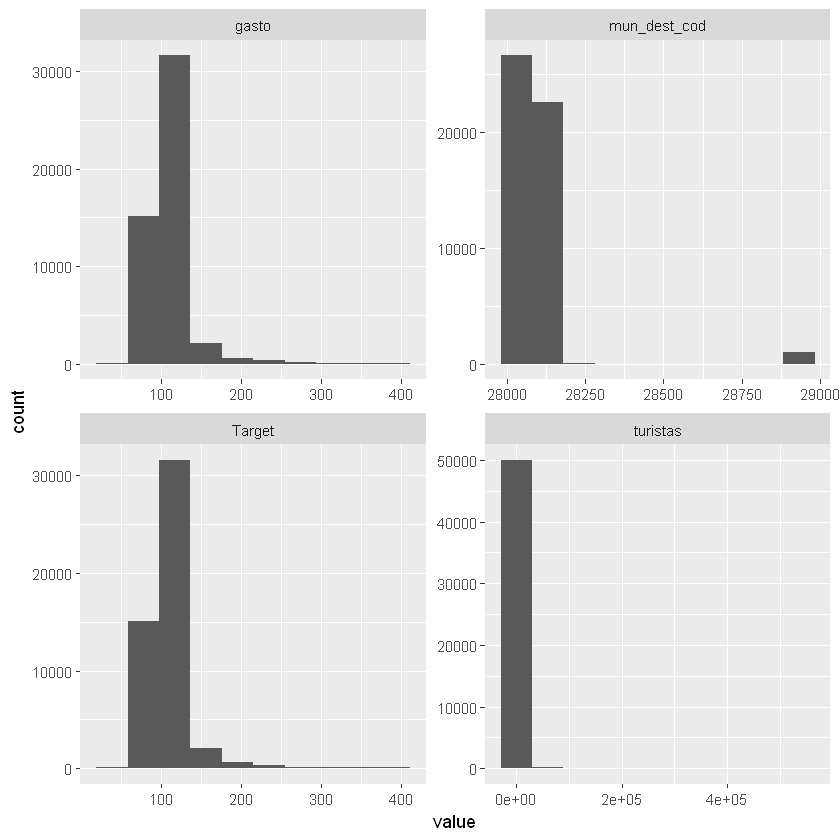

In [52]:
cdata |>
  pivot_longer(cols = everything()) |> 
  ggplot(aes(x = value)) +
  geom_histogram(bins = 10) +
  facet_wrap(~name, scales = "free")

### Box plot 

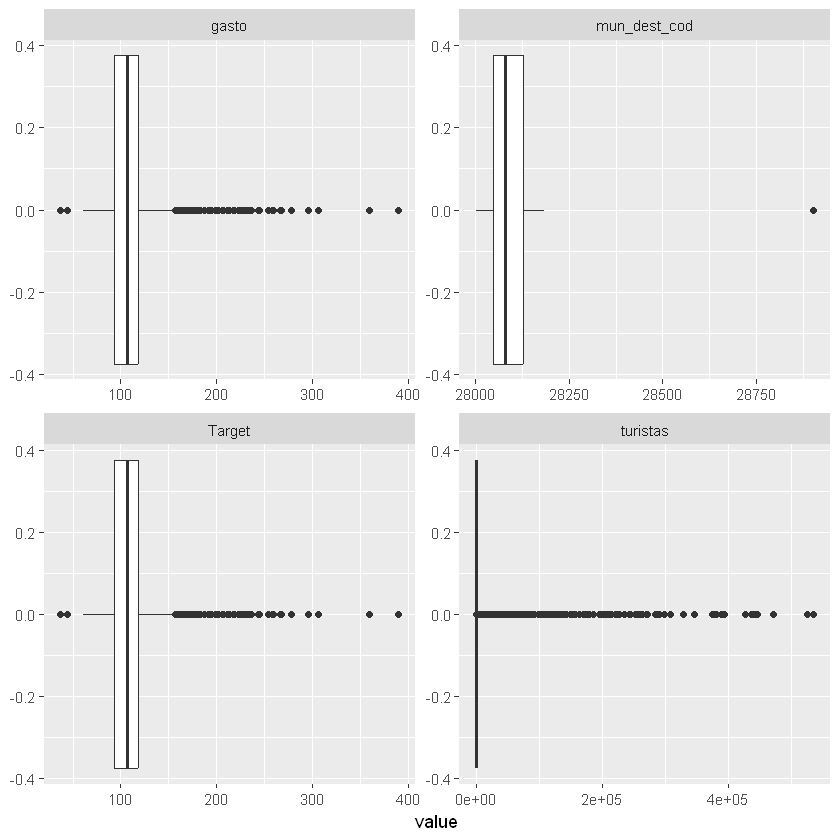

In [53]:
cdata |>
  pivot_longer(cols = everything()) |> 
  ggplot(aes(x = value)) +
  geom_boxplot() +
  facet_wrap(~name, scales = "free")

### Violin plot 

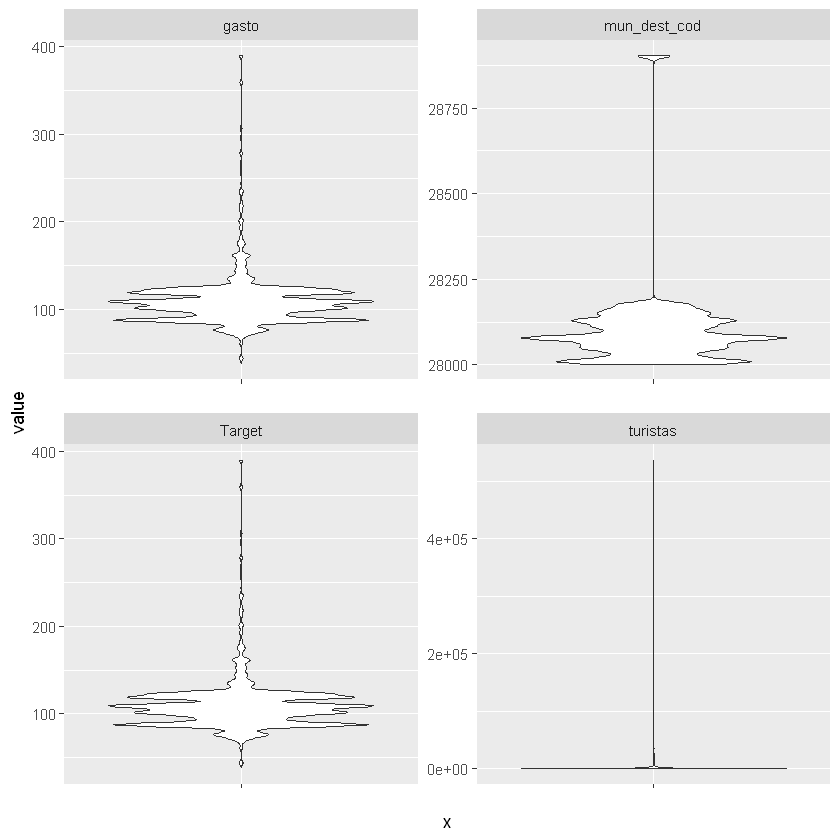

In [54]:
cdata |>
  pivot_longer(cols = everything()) |> 
  ggplot(aes(x = "", y = value)) +
  geom_violin() +
  facet_wrap(~name, scales = "free")

### Distribution plot 

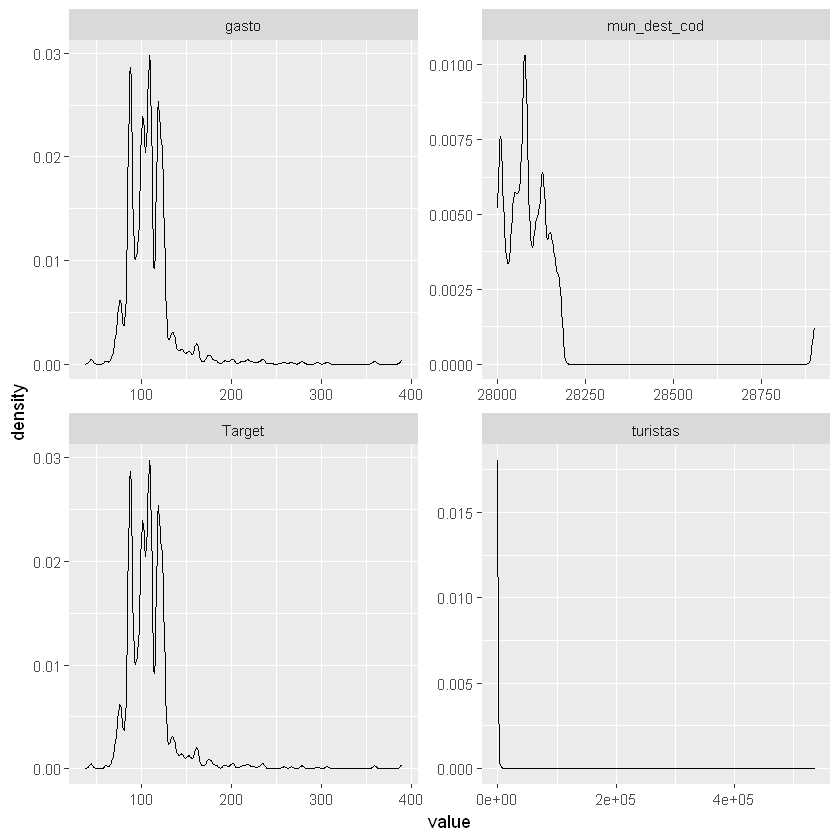

In [55]:
cdata |>
  pivot_longer(cols = everything()) |> 
  ggplot(aes(x = value)) +
  geom_density() +
  facet_wrap(~name, scales = "free")

##	Analyzing Categorical Variables 

### Selecting categorical variables

In [60]:
# Category colums
char_cols <- data |> select(where(~ is.character(.x))) |> colnames()
char_cols

[1] "mes"           "pais_orig_cod" "pais_orig"     "mun_dest"     
[5] "CMUN"

In [61]:
# Category colums
char_data <- data |> select(where(~ is.character(.x))) 
char_data

mes,pais_orig_cod,pais_orig,mun_dest,CMUN
<chr>,<chr>,<chr>,<chr>,<chr>
2019-08,110,Francia,Valdemoro,161
2021-07,010,Total Europa,Villanueva de la Cañada,176
2021-07,010,Total Europa,San Martín de la Vega,132
2022-01,000,Total,Sevilla la Nueva,141
2019-08,128,Rumania,San Fernando de Henares,130
2022-07,000,Total,Robregordo,126
2022-08,011,Total Unión Europea,Loeches,075
2022-03,126,Alemania,Alcalá de Henares,005
2020-01,121,Países Bajos,Griñón,066


### Most frequent entry

* Ver salida de `summarytools::freq()` arriba

In [62]:
# Calculate and visualizate the ratio of the most frequent entry for each feature


### Visualization of categorical variables

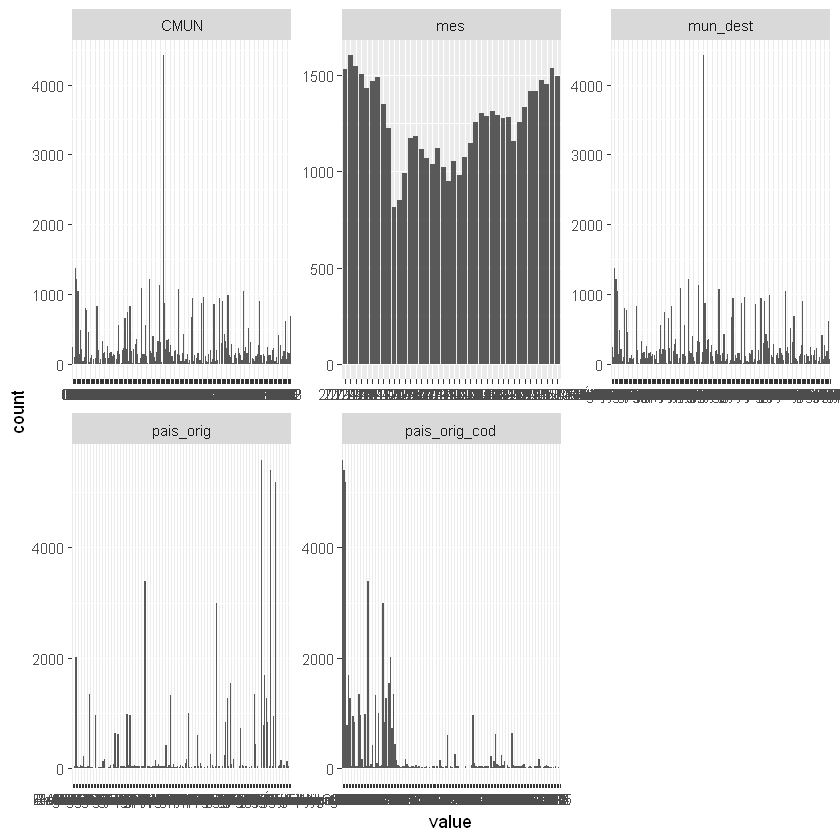

In [63]:
# returns a visualization of the number and frequency of categorical features
char_data |>
  pivot_longer(cols = everything()) |> 
  ggplot(aes(x = value)) +
  geom_bar() +
  facet_wrap(~name, scales = "free")

## Statistical Normality Tests

In [66]:
cdata_long <- cdata |> 
  pivot_longer(cols = everything())

### Test de Anderson-Darling



In [67]:
tapply(cdata_long$value, cdata_long$name, ad.test)

$gasto

	Anderson-Darling normality test

data:  X[[i]]
A = 2744.6, p-value < 2.2e-16


$mun_dest_cod

	Anderson-Darling normality test

data:  X[[i]]
A = 5712.5, p-value < 2.2e-16


$Target

	Anderson-Darling normality test

data:  X[[i]]
A = 2744.6, p-value < 2.2e-16


$turistas

	Anderson-Darling normality test

data:  X[[i]]
A = 17161, p-value < 2.2e-16



### Test de Lilliefors



In [68]:
tapply(cdata_long$value, cdata_long$name, lillie.test)

$gasto

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.20648, p-value < 2.2e-16


$mun_dest_cod

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.23731, p-value < 2.2e-16


$Target

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.20648, p-value < 2.2e-16


$turistas

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.46392, p-value < 2.2e-16



### QQ-plots

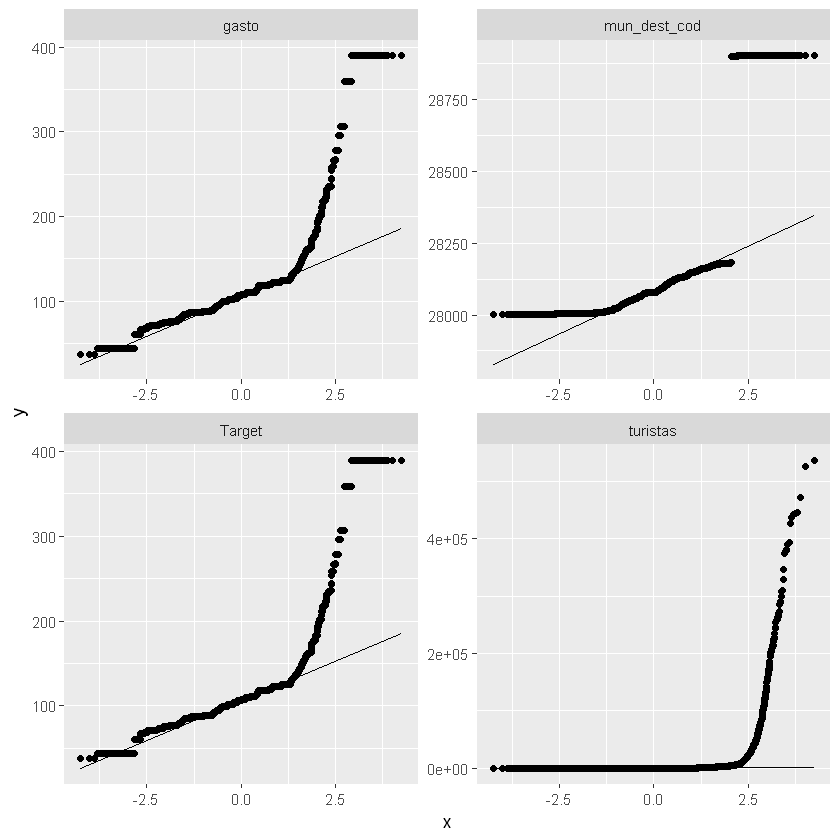

In [69]:
cdata |>
  pivot_longer(cols = everything()) |> 
  ggplot(aes(sample = value)) +
  geom_qq() +
  geom_qq_line() +
  facet_wrap(~name, scales = "free")

## Bivariate analysis

* Ver gráficos de dispersión y ggpairs arriba
* Completar si es necesario con alguna comparación específica (gráfico de dispersión o boxplot por grupos)

Correlaciones

In [ ]:
cor(cdata, use = "pairwise.complete.obs")

## Regression analysis

In [78]:
data

mes,pais_orig_cod,pais_orig,mun_dest_cod,mun_dest,turistas,CMUN,gasto,Target,is_train
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<lgl>
2019-08,110,Francia,28161,Valdemoro,466,161,76.360,76.360,TRUE
2021-07,010,Total Europa,28176,Villanueva de la Cañada,1375,176,99.650,99.650,TRUE
2021-07,010,Total Europa,28132,San Martín de la Vega,465,132,99.650,99.650,TRUE
2022-01,000,Total,28141,Sevilla la Nueva,54,141,107.820,107.820,TRUE
2019-08,128,Rumania,28130,San Fernando de Henares,135,130,109.210,109.210,TRUE
2022-07,000,Total,28126,Robregordo,30,126,118.230,118.230,TRUE
2022-08,011,Total Unión Europea,28075,Loeches,285,075,118.230,118.230,TRUE
2022-03,126,Alemania,28005,Alcalá de Henares,768,005,97.010,97.010,TRUE
2020-01,121,Países Bajos,28066,Griñón,31,066,76.620,76.620,TRUE


### Modelo completo regresión lineal simple

In [79]:
cdata_filtered <- data |>
    filter(is_train == TRUE) |>
    na.omit()

modelo <- lm(Target ~ ., data = cdata_filtered)
summary(modelo)

Warning message in summary.lm(modelo):
"essentially perfect fit: summary may be unreliable"



Call:
lm(formula = Target ~ ., data = cdata_filtered)

Residuals:
       Min         1Q     Median         3Q        Max 
-4.268e-13  0.000e+00  6.000e-16  1.100e-15  1.442e-11 

Coefficients: (316 not defined because of singularities)
                                              Estimate Std. Error    t value
(Intercept)                                 -1.714e-12  1.665e-12 -1.029e+00
mes2019-08                                   2.121e-15  2.887e-15  7.350e-01
mes2019-09                                  -1.121e-15  2.940e-15 -3.810e-01
mes2019-10                                  -7.908e-14  2.984e-15 -2.650e+01
mes2019-11                                  -7.855e-14  3.012e-15 -2.608e+01
mes2019-12                                  -7.774e-14  3.005e-15 -2.588e+01
mes2020-01                                   1.485e-14  2.949e-15  5.036e+00
mes2020-02                                   1.201e-14  3.039e-15  3.952e+00
mes2020-03                                   1.218e-14  3.113e-15  3.9

Warning message:
"not plotting observations with leverage one:
  4903, 15214, 23294, 26869, 31579, 33197, 37631"


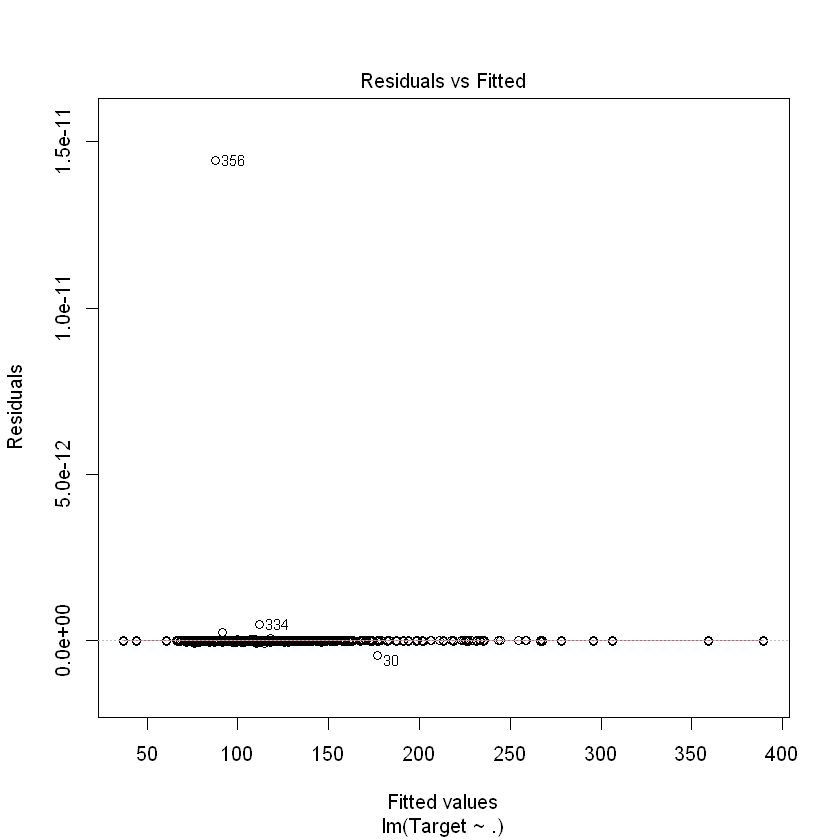

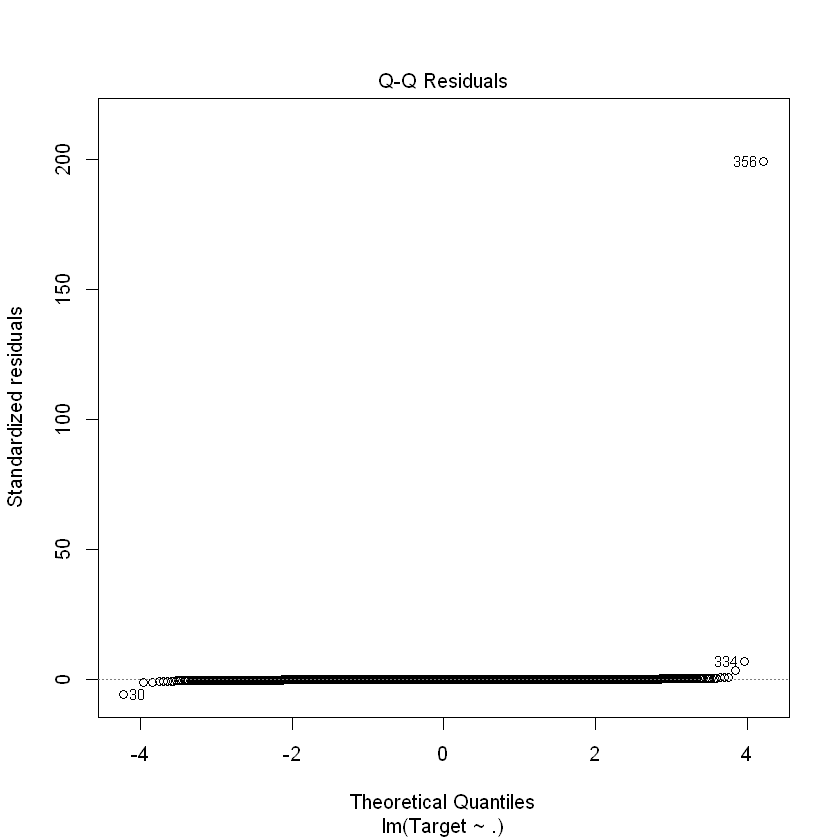

Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"
Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"


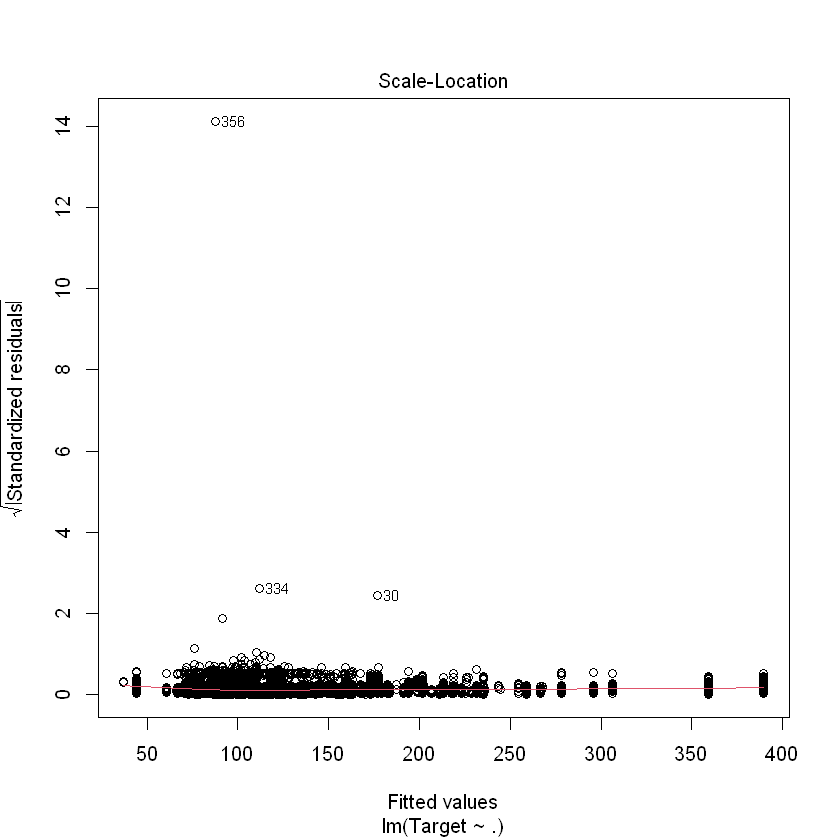

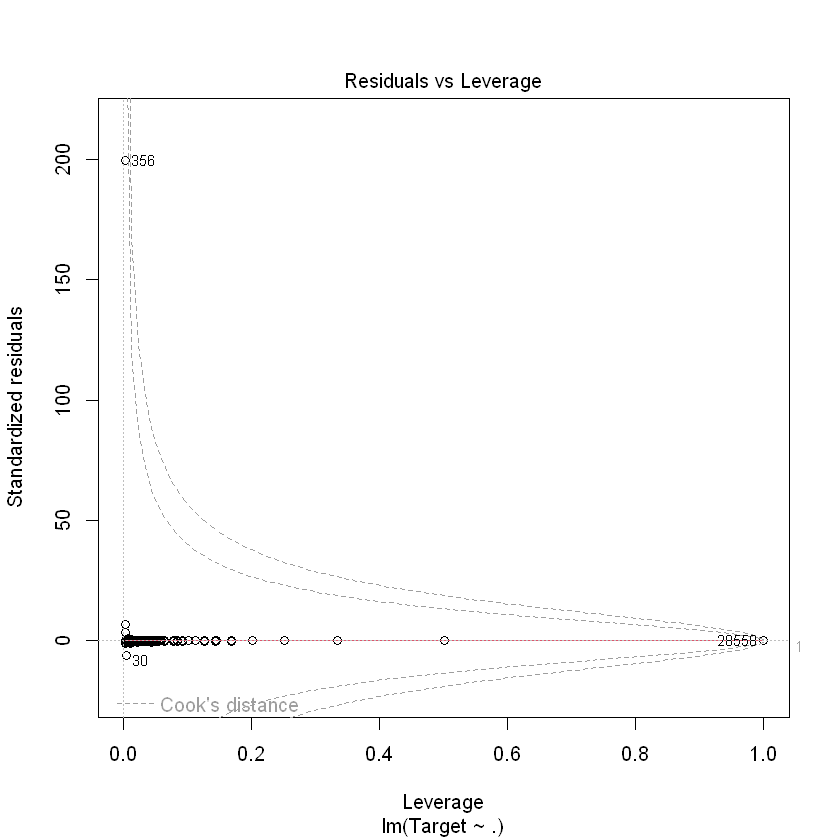

In [80]:
plot(modelo)

### Selección de variables

Este entrenamiento puede tardar mucho tiempo en completarse. En tal caso, ejecutar solo cuando sea realmente necesario.

In [81]:
modelo2 <- step(modelo, trace = FALSE)
summary(modelo2)


Warning message:
"attempting model selection on an essentially perfect fit is nonsense"
Warning message:
"attempting model selection on an essentially perfect fit is nonsense"
Warning message:
"attempting model selection on an essentially perfect fit is nonsense"
Warning message:
"attempting model selection on an essentially perfect fit is nonsense"
Warning message:
"attempting model selection on an essentially perfect fit is nonsense"
Warning message in summary.lm(modelo2):
"essentially perfect fit: summary may be unreliable"



Call:
lm(formula = Target ~ mes + pais_orig_cod + mun_dest + turistas + 
    gasto, data = cdata_filtered)

Residuals:
       Min         1Q     Median         3Q        Max 
-4.067e-12 -4.000e-16 -2.000e-16  1.000e-16  1.250e-13 

Coefficients:
                                        Estimate Std. Error    t value Pr(>|t|)
(Intercept)                            1.384e-13  1.759e-15  7.871e+01  < 2e-16
mes2019-08                            -2.063e-15  8.148e-16 -2.531e+00  0.01136
mes2019-09                            -7.338e-16  8.299e-16 -8.840e-01  0.37655
mes2019-10                             2.126e-14  8.423e-16  2.524e+01  < 2e-16
mes2019-11                             2.115e-14  8.501e-16  2.488e+01  < 2e-16
mes2019-12                             2.093e-14  8.480e-16  2.468e+01  < 2e-16
mes2020-01                            -4.620e-15  8.323e-16 -5.550e+00 2.87e-08
mes2020-02                            -1.382e-15  8.577e-16 -1.611e+00  0.10711
mes2020-03                       

## Stationary analysis

Este entrenamiento puede tardar mucho tiempo en completarse. En tal caso, ejecutar solo cuando sea realmente necesario.

- Si hay una variable fecha, usarla
- Si hay mes, o semana, convertir a fecha

In [82]:
tsdata <- data |>
    mutate(fecha = as.Date(parse_date_time(paste(ano, semana, 1, sep="/"),'Y/W/w')))

ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `fecha = as.Date(parse_date_time(paste(ano, semana, 1, sep = "/"), "Y/W/w"))`.
[1mCaused by error:[22m
[33m![39m object 'ano' not found


In [ ]:
names(data)

Todas las series, probablemente habría que filtrar por geografía

In [ ]:
tsdata |> 
  mutate(across(c(n_vacunas, nombre_zona), as.character))
  pivot_longer(cols = n_vacunas:interes_gripe) |> 
  ggplot(aes(x = fecha, y = value)) +
  geom_line() +
  facet_wrap(~name, scales = "free")